## Perceptron
* Useful links: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53    
* Four components of perceptron   
   * Input
   * Weight
   * Net sum: the dot production of two matrix
   * Activation function: the example of step function
   
![image](https://cdn-images-1.medium.com/max/1000/1*n6sJ4yZQzwKL9wnF5wnVNg.png)   
Example for the calculation:
![image](https://cdn-images-1.medium.com/max/1000/1*ztXU57QEETPHGXczHrSWSA.gif)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
np.random.seed(1)

## A Separable Classification Problem

In [51]:
# generate fake data that is linearly separable with a margin epsilon given the data
def getfake(samples, dimensions, epsilon):
    wfake = np.random.normal(size=(dimensions))   # fake weight vector for separation
    print('fake weight: ', wfake)
    bfake = np.random.normal(size=(1))            # fake bias
    print('fake bias: ', bfake)
    wfake = wfake / np.linalg.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = np.zeros(shape=(samples, dimensions))
    Y = np.zeros(shape=(samples))

    i = 0
    while (i < samples):
        tmp = np.random.normal(size=(1,dimensions))
        margin = np.dot(tmp, wfake) + bfake
        if (np.linalg.norm(tmp) < 3) & (abs(margin) > epsilon):
            X[i,:] = tmp[0]
            Y[i] = 1 if margin > 0 else -1
            i += 1
    return X, Y

In [52]:
# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        if (y == 1):
            plt.scatter(x[0], x[1], color='r')
        else:
            plt.scatter(x[0], x[1], color='b')

# plot contour plots on a [-3,3] x [-3,3] grid 
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = np.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = np.array(xx)
    zz[:,:,1] = np.array(yy)
    vv = np.dot(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv)
    plt.clabel(CS, inline=1, fontsize=10)

fake weight:  [-0.24701649 -0.12088931]
fake bias:  [-0.26056059]


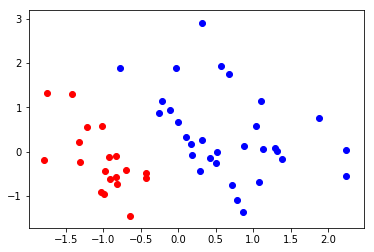

In [59]:
X, Y = getfake(50, 2, 0.3)
plotdata(X,Y)
plt.show()

## Perceptron Implementation

In [ ]:
#The code is incomplete. I used it on discussion but delete some key points for implementation here.
def perceptron(w,b,x,y):
    if (y * (np.dot() + b)) ??:
        w += 
        b += 
        return 1
    else:
        return 0

Encountered an error and updated parameters
data   [ 0.42300321 -0.13424856], label -1.0
weight [-0.42300321  0.13424856], bias  [-1.]


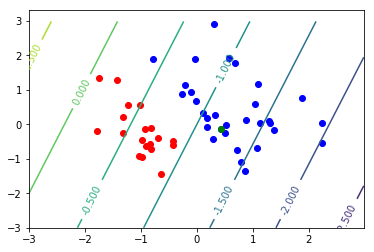

Encountered an error and updated parameters
data   [-1.78773771 -0.18581086], label 1.0
weight [-2.21074092 -0.05156229], bias  [0.]


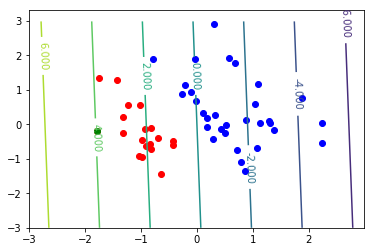

Encountered an error and updated parameters
data   [-0.26120192  0.8632634 ], label -1.0
weight [-1.949539   -0.91482569], bias  [-1.]


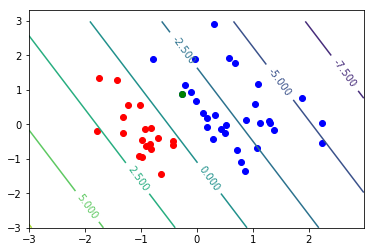

In [60]:
w = np.zeros((2))
b = np.zeros((1))
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x,y))
        print('weight {}, bias  {}'.format(w,b))
        plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0], x[1], color='g')
        plt.show()

## Perceptron Convergence

In [61]:
Eps = np.arange(0.025, 0.45, 0.025)
Err = np.zeros(shape=(Eps.size))

for j in range(10):
    for (i,epsilon) in enumerate(Eps):
        X, Y = getfake(1000, 2, epsilon)

        for (x,y) in zip(X,Y):
            Err[i] += perceptron(w,b,x,y)

Err = Err / 10.0

fake weight:  [ 1.50452187 -0.57842697]
fake bias:  [-0.99762084]
fake weight:  [-0.28787813  1.32891232]
fake bias:  [-1.1350582]
fake weight:  [-1.11000888  1.33205138]
fake bias:  [0.64878964]
fake weight:  [ 0.12583451 -0.75456258]
fake bias:  [-0.08355685]
fake weight:  [-0.44764954  0.49369825]
fake bias:  [0.09210443]
fake weight:  [-1.15020874  0.62787077]
fake bias:  [-0.77325477]
fake weight:  [ 0.50954352 -0.2560173 ]
fake bias:  [0.93943951]
fake weight:  [ 0.83759462 -0.73975396]
fake bias:  [0.06544194]
fake weight:  [ 1.22401961 -0.30791844]
fake bias:  [-1.15828084]
fake weight:  [0.24645738 0.33127431]
fake bias:  [-0.74267095]
fake weight:  [-0.27969742 -0.2120557 ]
fake bias:  [-0.57509497]
fake weight:  [ 0.25699263 -0.25057926]
fake bias:  [0.72157706]
fake weight:  [0.63173937 0.39214256]
fake bias:  [0.36557932]
fake weight:  [-1.0386743   0.81365802]
fake bias:  [-0.76173791]
fake weight:  [-1.8923919   1.83711537]
fake bias:  [-0.42631975]
fake weight:  [ 0.997

fake weight:  [ 1.05577848 -2.66445503]
fake bias:  [-1.27234281]
fake weight:  [-0.04250873  0.94167914]
fake bias:  [-1.12478142]
fake weight:  [ 0.34985382 -1.88524896]
fake bias:  [0.01330145]
fake weight:  [-0.95608715  0.84116781]
fake bias:  [1.08285731]
fake weight:  [ 0.28841004 -1.4607575 ]
fake bias:  [0.56492844]
fake weight:  [-0.48695664 -0.11703743]
fake bias:  [1.05103368]
fake weight:  [-0.17249504  0.64012595]
fake bias:  [-2.48539444]
fake weight:  [-1.6146362   0.40726312]
fake bias:  [0.43679288]
fake weight:  [-1.20669944 -1.1121487 ]
fake bias:  [1.58701249]
fake weight:  [1.56922829 1.2155523 ]
fake bias:  [-1.45784058]
fake weight:  [-0.351158    0.29432709]
fake bias:  [0.18634672]
fake weight:  [0.64841897 0.50073643]
fake bias:  [-0.57242786]
fake weight:  [-1.53484473  2.8835174 ]
fake bias:  [-0.62435261]
fake weight:  [0.42605467 0.71719463]
fake bias:  [0.6261702]
fake weight:  [ 1.99019702 -0.71092156]
fake bias:  [1.22281673]
fake weight:  [-2.12144037

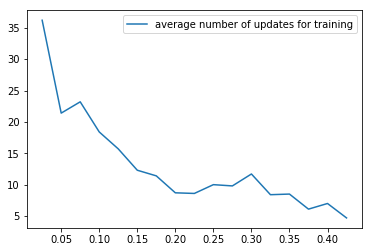

In [62]:
plt.plot(Eps, Err, label='average number of updates for training')
plt.legend()
plt.show()

In [ ]:
for number of batches in range(8000):
    random shuffle and choose one batch
    for x,y in zip(X,Y):
        train your perceptron
    calculate the accuracy